# 📊 Data Exploration & Quality Assessment

**Notebook 1 of 5** | Foundation Analysis

---

## 🎯 Overview

This notebook provides comprehensive exploratory data analysis (EDA) of the GitHub language dominance dataset. We'll examine data quality, distributions, language characteristics, top repositories, and health indicators.

### What You'll Discover:
- ✅ Dataset structure and quality validation
- ✅ Score distributions across all metrics
- ✅ Language-by-language performance comparison
- ✅ Top repository identification by multiple criteria
- ✅ Health indicator impact analysis
- ✅ Actionable insights for next steps

### Expected Output:
A thorough understanding of 1,200 repositories across 12 programming languages, validated and ready for deeper analysis.

---

## 📋 Table of Contents

| Section | Focus Area |
|---------|------------|
| [1. Setup & Data Loading](#setup) | Environment configuration and data import |
| [2. Data Quality Assessment](#quality) | Missing values, duplicates, validation |
| [3. Distribution Analysis](#distributions) | Score patterns and statistical summaries |
| [4. Language Distribution](#languages) | Performance by programming language |
| [5. Top Repositories](#top-repos) | Leaders by stars, scores, and activity |
| [6. Health Indicators](#health) | Repository maturity and professionalism |
| [7. Key Insights](#insights) | Summary findings and recommendations |

---

<a id="setup"></a>
## 1️⃣ Setup & Data Loading

Let's begin by importing required libraries and loading our dataset.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Display settings for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

print("✅ All libraries imported successfully!")
print("✅ Visualization settings configured!")
print("\n📦 Libraries loaded:")
print("   - pandas (data manipulation)")
print("   - numpy (numerical operations)")
print("   - matplotlib (static plots)")
print("   - seaborn (statistical visualizations)")
print("\n🎨 Ready to explore the data!")

✅ All libraries imported successfully!
✅ Visualization settings configured!

📦 Libraries loaded:
   - pandas (data manipulation)
   - numpy (numerical operations)
   - matplotlib (static plots)
   - seaborn (statistical visualizations)

🎨 Ready to explore the data!


### 📂 Load Dataset

Now let's load the combined dataset containing all 1,200 repositories.

In [2]:
# Load the combined dataset
data_file = '../data/raw/repositories_enriched.csv'

try:
    df = pd.read_csv(data_file)
    print(f"✅ Dataset loaded successfully!")
    print(f"📊 Shape: {df.shape[0]} repositories × {df.shape[1]} columns")
    print(f"\n🔍 Dataset Overview:")
    print(f"   - Languages: {df['language'].nunique()}")
    print(f"   - Total Stars: {df['stars'].sum():,}")
    print(f"   - Total Forks: {df['forks'].sum():,}")
    print(f"   - Date Range: {df['created_at'].min()[:4]} to {df['created_at'].max()[:4]}")
    print(f"\n📈 Score Ranges:")
    print(f"   - Overall Score: {df['overall_score'].min():.2f} to {df['overall_score'].max():.2f}")
    print(f"   - Avg Overall Score: {df['overall_score'].mean():.2f}")
    print(f"\n📋 Column Types:")
    print(f"   - Numeric: {len(df.select_dtypes(include=[np.number]).columns)}")
    print(f"   - Object: {len(df.select_dtypes(include=['object']).columns)}")
    print(f"   - Boolean: {len(df.select_dtypes(include=['bool']).columns)}")
except FileNotFoundError:
    print("❌ Error: Data file not found!")
    print(f"   Please ensure '{data_file}' is available before running this notebook.")
except Exception as e:
    print(f"❌ Error loading data: {e}")

✅ Dataset loaded successfully!
📊 Shape: 1200 repositories × 52 columns

🔍 Dataset Overview:
   - Languages: 12
   - Total Stars: 43,367,999
   - Total Forks: 6,807,863
   - Date Range: 2008 to 2025

📈 Score Ranges:
   - Overall Score: 8.05 to 93.95
   - Avg Overall Score: 42.53

📋 Column Types:
   - Numeric: 33
   - Object: 12
   - Boolean: 7


### 🔍 Inspect Data Structure

Let's examine the dataset structure, columns, and get a preview of the data.

In [3]:
# Display data structure
print("📋 DATA STRUCTURE OVERVIEW")
print("=" * 80)
print(f"\nColumns: {len(df.columns)}")
print(f"Rows: {len(df)}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024 / 1024:.2f} MB")

print(f"\n🔍 Column Information:")
print("-" * 80)
for col in df.columns:
    dtype = str(df[col].dtype)
    nulls = df[col].isnull().sum()
    unique = df[col].nunique()
    print(f"{col:<25} {dtype:<10} {nulls:>8} nulls {unique:>8} unique")

print(f"\n📊 Sample Data (first 3 rows):")
print("-" * 80)
display(df.head(3))

print(f"\n🎯 Key Metrics Summary:")
print("-" * 80)
numeric_cols = ['stars', 'forks', 'watchers', 'contributors_count', 'commits_30d', 'commits_90d', 'commits_365d']
for col in numeric_cols:
    if col in df.columns:
        print(f"{col:<20}: {df[col].sum():>10,} total | {df[col].mean():>8.1f} avg | {df[col].max():>8,} max")

📋 DATA STRUCTURE OVERVIEW

Columns: 52
Rows: 1200
Memory usage: 1.44 MB

🔍 Column Information:
--------------------------------------------------------------------------------
id                        int64             0 nulls     1200 unique
name                      object            0 nulls     1190 unique
full_name                 object            0 nulls     1200 unique
owner                     object            0 nulls     1034 unique
description               object            7 nulls     1192 unique
language                  object            0 nulls       12 unique
created_at                object            0 nulls     1200 unique
updated_at                object            0 nulls     1140 unique
pushed_at                 object            0 nulls     1200 unique
stars                     int64             0 nulls     1194 unique
forks                     int64             0 nulls     1121 unique
watchers                  int64             0 nulls     1194 unique
open_iss

,id,name,full_name,owner,description,language,created_at,updated_at,pushed_at,stars,forks,watchers,open_issues,size_kb,license,has_wiki,has_pages,contributors_count,commits_30d,commits_90d,commits_365d,has_readme,has_license,has_contributing,has_code_of_conduct,url,stars_normalized,forks_normalized,watchers_normalized,popularity_score,commits_30d_normalized,contributors_normalized,days_since_push,recency_score,activity_score,health_score,overall_score,stars_per_contributor,forks_per_contributor,engagement_per_contributor,engagement_density,recent_commit_share,quarter_commit_share,issue_to_commit_ratio,freshness_index,support_load,compliance_score,enterprise_ready,maturity_score,growth_signal,growth_segment,compliance_tier
0,184456251,PowerToys,microsoft/PowerToys,microsoft,Microsoft PowerToys is a collection of utiliti...,C#,2019-05-01 17:44:02+00:00,2025-10-18 22:06:09+00:00,2025-10-18 21:26:55+00:00,124775,7426,124775,7414,451590,MIT License,True,False,414,100,100,100,True,True,True,True,https://github.com/microsoft/PowerToys,100.000000,29.577409,100.000000,78.873223,100.0,93.453725,0,100.000000,98.036117,100.0,90.861930,301.388889,17.937198,620.714976,0.569047,1.00,1.0,73.405941,1.0,17.908213,1.0,True,94.030947,1.000000,High,Excellent
1,17620347,aspnetcore,dotnet/aspnetcore,dotnet,ASP.NET Core is a cross-platform .NET framewor...,C#,2014-03-11 06:09:42+00:00,2025-10-18 22:08:05+00:00,2025-10-18 18:20:00+00:00,37271,10464,37271,3476,368328,MIT License,True,False,340,99,100,100,True,True,True,True,https://github.com/dotnet/aspnetcore,29.870567,41.677620,29.870567,33.412683,99.0,76.749436,0,100.000000,92.624831,100.0,70.783764,109.620588,30.776471,250.017647,0.230789,0.99,1.0,34.415842,1.0,10.223529,1.0,True,80.771861,0.995000,High,Excellent
2,199570071,v2rayN,2dust/v2rayN,2dust,"A GUI client for Windows, Linux and macOS, sup...",C#,2019-07-30 03:47:24+00:00,2025-10-18 22:08:26+00:00,2025-10-17 13:01:36+00:00,88248,13462,88248,6,44030,GNU General Public License v3.0,True,False,89,65,100,100,True,True,False,False,https://github.com/2dust/v2rayN,70.725706,53.618513,70.725706,65.593548,65.0,20.090293,1,99.726027,61.944896,60.0,62.918133,991.550562,151.258427,2134.359551,4.314286,0.65,1.0,0.059406,0.5,0.067416,0.5,False,62.079101,0.824452,High,Basic



🎯 Key Metrics Summary:
--------------------------------------------------------------------------------
stars               : 43,367,999 total |  36140.0 avg |  430,370 max
forks               :  6,807,863 total |   5673.2 avg |   74,915 max
watchers            : 43,367,999 total |  36140.0 avg |  430,370 max
contributors_count  :    243,825 total |    203.2 avg |      484 max
commits_30d         :     36,361 total |     30.3 avg |      100 max
commits_90d         :     55,689 total |     46.4 avg |      100 max
commits_365d        :     78,729 total |     65.6 avg |      100 max


---

<a id="quality"></a>
## 2️⃣ Data Quality Assessment

Comprehensive validation to ensure data integrity and reliability.

In [4]:
# Data Quality Assessment
print("🔍 DATA QUALITY ASSESSMENT")
print("=" * 80)

# Missing values analysis
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

print(f"\n📊 Missing Values Analysis:")
print("-" * 80)
missing_summary = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing %': missing_percent.round(2)
})
missing_summary = missing_summary[missing_summary['Missing Count'] > 0]
if len(missing_summary) > 0:
    display(missing_summary.sort_values('Missing Count', ascending=False))
else:
    print("✅ No missing values found!")

# Duplicate analysis
duplicates = df.duplicated().sum()
print(f"\n🔄 Duplicate Analysis:")
print("-" * 80)
print(f"   Duplicate rows: {duplicates}")
if duplicates > 0:
    print(f"   ⚠️  {duplicates} duplicate rows found")
else:
    print("   ✅ No duplicate rows found")

# Language distribution check
lang_counts = df['language'].value_counts()
print(f"\n🏷️  Language Distribution:")
print("-" * 80)
for lang, count in lang_counts.items():
    print(f"   {lang:<15}: {count:>3} repositories")
print(f"\n   Expected: 100 repos per language")
print(f"   Total languages: {len(lang_counts)}")

# Data type validation
print(f"\n📋 Data Type Validation:")
print("-" * 80)
expected_numeric = ['stars', 'forks', 'watchers', 'contributors_count', 'commits_30d', 'commits_90d', 'commits_365d',
                   'stars_normalized', 'forks_normalized', 'watchers_normalized', 'popularity_score',
                   'commits_30d_normalized', 'contributors_normalized', 'days_since_push', 'recency_score',
                   'activity_score', 'health_score', 'overall_score']

for col in expected_numeric:
    if col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            print(f"   ✅ {col:<25}: numeric")
        else:
            print(f"   ❌ {col:<25}: expected numeric, got {df[col].dtype}")

# Score range validation
print(f"\n📈 Score Range Validation:")
print("-" * 80)
score_cols = ['popularity_score', 'activity_score', 'health_score', 'overall_score']
for col in score_cols:
    if col in df.columns:
        min_val = df[col].min()
        max_val = df[col].max()
        status = "✅" if 0 <= min_val <= max_val <= 100 else "⚠️"
        print(f"   {status} {col:<15}: {min_val:.2f} - {max_val:.2f}")

print(f"\n🎯 Quality Assessment Complete!")
if missing_data.sum() == 0 and duplicates == 0:
    print("✅ Dataset appears to be clean and ready for analysis!")
else:
    print("⚠️  Some data quality issues detected - review above for details")

🔍 DATA QUALITY ASSESSMENT

📊 Missing Values Analysis:
--------------------------------------------------------------------------------


,Missing Count,Missing %
quarter_commit_share,176,14.67
recent_commit_share,176,14.67
growth_segment,166,13.83
license,56,4.67
description,7,0.58
engagement_per_contributor,1,0.08
forks_per_contributor,1,0.08
stars_per_contributor,1,0.08
support_load,1,0.08



🔄 Duplicate Analysis:
--------------------------------------------------------------------------------
   Duplicate rows: 0
   ✅ No duplicate rows found

🏷️  Language Distribution:
--------------------------------------------------------------------------------
   C#             : 100 repositories
   C++            : 100 repositories
   Go             : 100 repositories
   Java           : 100 repositories
   JavaScript     : 100 repositories
   Kotlin         : 100 repositories
   PHP            : 100 repositories
   Python         : 100 repositories
   Ruby           : 100 repositories
   Rust           : 100 repositories
   Swift          : 100 repositories
   TypeScript     : 100 repositories

   Expected: 100 repos per language
   Total languages: 12

📋 Data Type Validation:
--------------------------------------------------------------------------------
   ✅ stars                    : numeric
   ✅ forks                    : numeric
   ✅ watchers                 : numeric
   ✅ co

---

<a id="distributions"></a>
## 3️⃣ Distribution Analysis

Examine how scores are distributed across all repositories.

📊 STATISTICAL SUMMARY

📈 Key Metrics Summary:
--------------------------------------------------------------------------------


,stars,forks,watchers,contributors_count,overall_score,popularity_score,activity_score,health_score
count,1200.00,1200.00,1200.00,1200.00,1200.00,1200.00,1200.00,1200.00
mean,36140.00,5673.22,36140.00,203.19,42.53,21.15,49.54,66.92
std,36844.16,8098.61,36844.16,144.13,14.37,15.63,28.27,18.96
min,5878.00,22.00,5878.00,0.00,8.05,6.02,0.06,20.00
25%,13054.75,1330.50,13054.75,68.75,31.89,12.14,31.56,60.00
50%,26741.00,2995.50,26741.00,181.00,41.47,15.75,47.21,60.00
75%,45106.25,6803.50,45106.25,340.50,51.88,23.73,72.13,80.00
max,430370.00,74915.00,430370.00,484.00,93.95,100.00,100.00,100.00


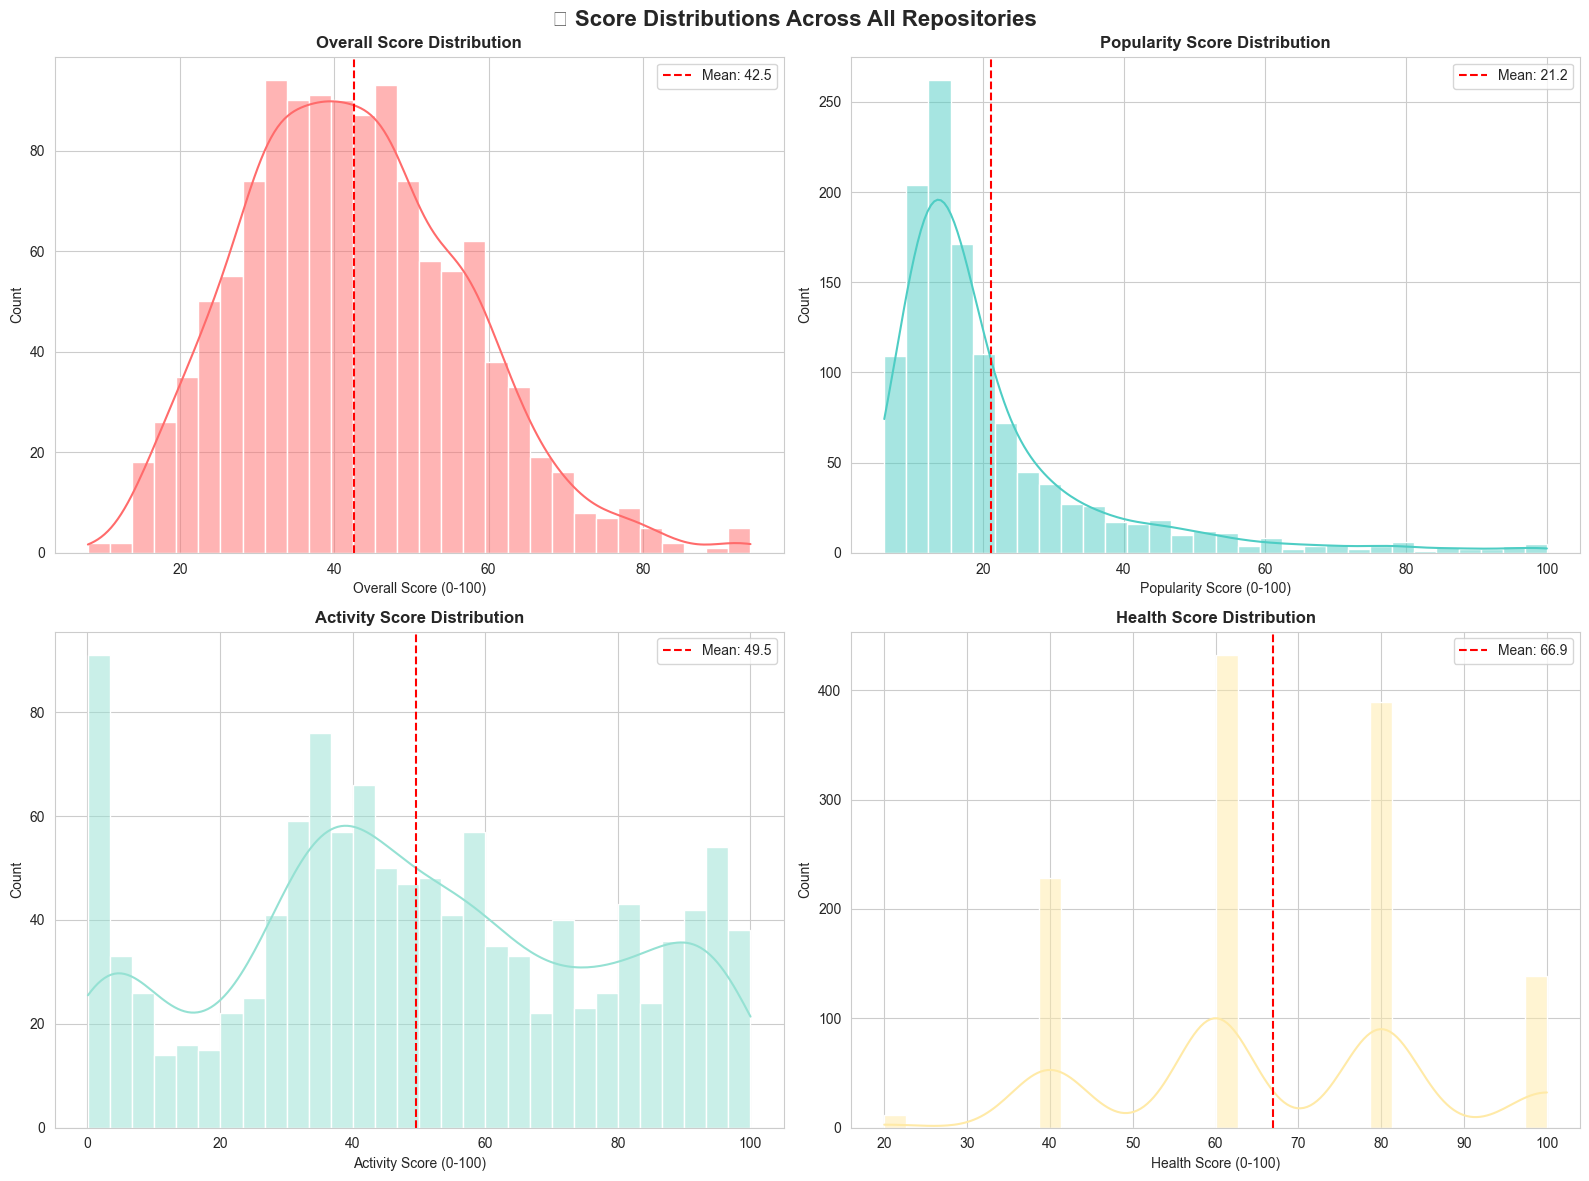


📊 Distribution Insights:
--------------------------------------------------------------------------------
   • Overall Score: Mean 42.53, Std 14.37
   • Popularity Score: Most variable (Std 15.63)
   • Activity Score: Wide range (0.1 - 100.0)
   • Health Score: Most consistent (Std 18.96)


In [5]:
# Statistical Summary
print("📊 STATISTICAL SUMMARY")
print("=" * 80)

# Key metrics summary
key_metrics = ['stars', 'forks', 'watchers', 'contributors_count', 'overall_score', 'popularity_score', 'activity_score', 'health_score']

print(f"\n📈 Key Metrics Summary:")
print("-" * 80)
summary_stats = df[key_metrics].describe().round(2)
display(summary_stats)

# Score distributions visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📊 Score Distributions Across All Repositories', fontsize=16, fontweight='bold')

# Overall Score
sns.histplot(data=df, x='overall_score', bins=30, kde=True, ax=axes[0,0], color='#FF6B6B')
axes[0,0].set_title('Overall Score Distribution', fontweight='bold')
axes[0,0].set_xlabel('Overall Score (0-100)')
axes[0,0].axvline(df['overall_score'].mean(), color='red', linestyle='--', label=f'Mean: {df["overall_score"].mean():.1f}')
axes[0,0].legend()

# Popularity Score
sns.histplot(data=df, x='popularity_score', bins=30, kde=True, ax=axes[0,1], color='#4ECDC4')
axes[0,1].set_title('Popularity Score Distribution', fontweight='bold')
axes[0,1].set_xlabel('Popularity Score (0-100)')
axes[0,1].axvline(df['popularity_score'].mean(), color='red', linestyle='--', label=f'Mean: {df["popularity_score"].mean():.1f}')
axes[0,1].legend()

# Activity Score
sns.histplot(data=df, x='activity_score', bins=30, kde=True, ax=axes[1,0], color='#95E1D3')
axes[1,0].set_title('Activity Score Distribution', fontweight='bold')
axes[1,0].set_xlabel('Activity Score (0-100)')
axes[1,0].axvline(df['activity_score'].mean(), color='red', linestyle='--', label=f'Mean: {df["activity_score"].mean():.1f}')
axes[1,0].legend()

# Health Score
sns.histplot(data=df, x='health_score', bins=30, kde=True, ax=axes[1,1], color='#FFEAA7')
axes[1,1].set_title('Health Score Distribution', fontweight='bold')
axes[1,1].set_xlabel('Health Score (0-100)')
axes[1,1].axvline(df['health_score'].mean(), color='red', linestyle='--', label=f'Mean: {df["health_score"].mean():.1f}')
axes[1,1].legend()

plt.tight_layout()
plt.show()

print("\n📊 Distribution Insights:")
print("-" * 80)
print(f"   • Overall Score: Mean {df['overall_score'].mean():.2f}, Std {df['overall_score'].std():.2f}")
print(f"   • Popularity Score: Most variable (Std {df['popularity_score'].std():.2f})")
print(f"   • Activity Score: Wide range ({df['activity_score'].min():.1f} - {df['activity_score'].max():.1f})")
print(f"   • Health Score: Most consistent (Std {df['health_score'].std():.2f})")

---

<a id="languages"></a>
## 4️⃣ Language Distribution

Analyze repository counts and performance across all 12 programming languages.

🏷️ LANGUAGE DISTRIBUTION ANALYSIS

📊 Repository Count by Language:
--------------------------------------------------------------------------------
   C#             : 100 repos (  8.3%)
   C++            : 100 repos (  8.3%)
   Go             : 100 repos (  8.3%)
   Java           : 100 repos (  8.3%)
   JavaScript     : 100 repos (  8.3%)
   Kotlin         : 100 repos (  8.3%)
   PHP            : 100 repos (  8.3%)
   Python         : 100 repos (  8.3%)
   Ruby           : 100 repos (  8.3%)
   Rust           : 100 repos (  8.3%)
   Swift          : 100 repos (  8.3%)
   TypeScript     : 100 repos (  8.3%)


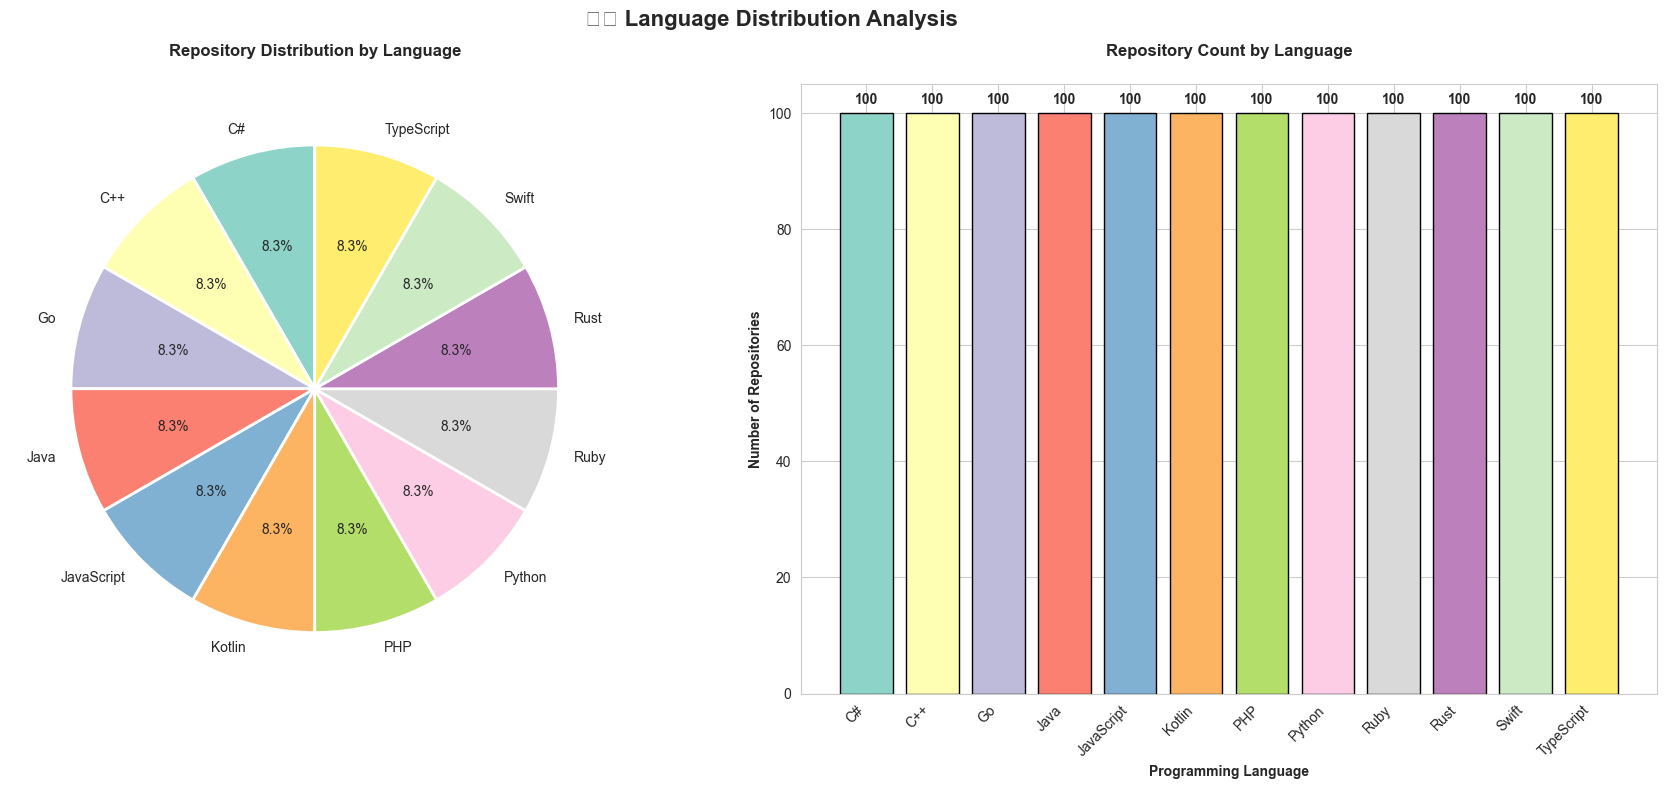


🏆 Language Performance Summary:
--------------------------------------------------------------------------------
Language        Overall Score   Total Stars  Total Forks 
--------------------------------------------------------------------------------
Rust             49.40 ±13.20  3,461,833.0   233,757.0
TypeScript       48.33 ±11.76  6,860,151.0   995,677.0
Go               46.92 ±14.03  4,301,920.0   493,763.0
C++              44.12 ±14.74  3,721,389.0   683,509.0
Python           43.49 ±14.87  7,810,721.0  1,315,442.0
JavaScript       43.31 ±13.80  5,873,437.0   897,308.0
Ruby             42.40 ±15.57  1,464,028.0   267,438.0
Java             41.45 ±15.07  3,607,982.0   981,908.0
Kotlin           38.49 ±12.64  1,405,327.0   218,416.0
PHP              38.20 ±13.88  1,537,067.0   282,285.0
Swift            37.43 ±12.49  1,486,132.0   154,115.0
C#               36.78 ±13.49  1,838,012.0   284,245.0

💡 Key Observations:
   • All languages have exactly 100 repositories (balanced datase

In [6]:
# Language Distribution Analysis
print("🏷️ LANGUAGE DISTRIBUTION ANALYSIS")
print("=" * 80)

# Repository count by language
lang_counts = df['language'].value_counts().sort_values(ascending=False)

print(f"\n📊 Repository Count by Language:")
print("-" * 80)
for lang, count in lang_counts.items():
    percentage = (count / len(df)) * 100
    print(f"   {lang:<15}: {count:>3} repos ({percentage:>5.1f}%)")

# Language distribution visualizations
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('🏷️ Language Distribution Analysis', fontsize=16, fontweight='bold')

# Pie chart
colors = plt.cm.Set3(np.linspace(0, 1, len(lang_counts)))
axes[0].pie(lang_counts.values, labels=lang_counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90, wedgeprops={'edgecolor': 'white', 'linewidth': 2})
axes[0].set_title('Repository Distribution by Language', fontweight='bold', pad=20)

# Bar chart
bars = axes[1].bar(range(len(lang_counts)), lang_counts.values, color=colors, edgecolor='black', linewidth=1)
axes[1].set_xlabel('Programming Language', fontweight='bold')
axes[1].set_ylabel('Number of Repositories', fontweight='bold')
axes[1].set_title('Repository Count by Language', fontweight='bold', pad=20)
axes[1].set_xticks(range(len(lang_counts)))
axes[1].set_xticklabels(lang_counts.index, rotation=45, ha='right')

# Add value labels on bars
for bar, count in zip(bars, lang_counts.values):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                f'{count}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Language performance summary
print(f"\n🏆 Language Performance Summary:")
print("-" * 80)
lang_performance = df.groupby('language').agg({
    'overall_score': ['mean', 'std', 'min', 'max'],
    'stars': 'sum',
    'forks': 'sum'
}).round(2)

lang_performance.columns = ['overall_mean', 'overall_std', 'overall_min', 'overall_max', 'total_stars', 'total_forks']
lang_performance = lang_performance.sort_values('overall_mean', ascending=False)

print(f"{'Language':<15} {'Overall Score':<15} {'Total Stars':<12} {'Total Forks':<12}")
print("-" * 80)
for idx, row in lang_performance.iterrows():
    print(f"{idx:<15} {row['overall_mean']:>6.2f} ±{row['overall_std']:>5.2f}  {row['total_stars']:>10,}  {row['total_forks']:>10,}")

print(f"\n💡 Key Observations:")
print(f"   • All languages have exactly 100 repositories (balanced dataset)")
print(f"   • Score variation: {lang_performance['overall_std'].min():.2f} - {lang_performance['overall_std'].max():.2f} std dev")
print(f"   • Star leaders: {lang_performance['total_stars'].idxmax()} ({lang_performance['total_stars'].max():,})")
print(f"   • Top performer: {lang_performance.index[0]} ({lang_performance.iloc[0]['overall_mean']:.2f} avg score)")

---

<a id="top-repos"></a>
## 5️⃣ Top Repositories

Identify leading repositories by stars, overall score, and activity level.

🏆 TOP REPOSITORIES ANALYSIS

⭐ Top 10 Repositories by Stars:
--------------------------------------------------------------------------------


,name,language,stars,forks,overall_score
1100,freeCodeCamp,TypeScript,430370,42022,79.283128
700,free-programming-books,Python,372611,64795,83.969834
707,public-apis,Python,370290,38965,65.636997
1101,developer-roadmap,TypeScript,341234,43153,78.205441
711,system-design-primer,Python,322950,52686,62.708450
718,awesome-python,Python,264737,26477,58.435966
400,react,JavaScript,239804,49594,93.947972
704,Python,Python,210866,48694,67.391095
1166,vue,TypeScript,209578,33796,43.200013
413,javascript-algorithms,JavaScript,193524,30912,58.229066



🏆 Top 10 Repositories by Overall Score:
--------------------------------------------------------------------------------


,name,language,overall_score,stars,forks
400,react,JavaScript,93.947972,239804,49594
100,tensorflow,C++,93.863636,192085,74915
800,rails,Ruby,92.618042,57724,22004
600,SecLists,PHP,91.854839,66380,24713
900,rust,Rust,91.464369,107268,13863
0,PowerToys,C#,90.861930,124775,7426
200,kubernetes,Go,84.821408,118067,41539
700,free-programming-books,Python,83.969834,372611,64795
801,mastodon,Ruby,82.245014,49133,7334
802,metasploit-framework,Ruby,81.614808,36740,14588



⚡ Top 10 Repositories by Activity Score:
--------------------------------------------------------------------------------


,name,language,activity_score,contributors_count,commits_365d
903,zed,Rust,100.000000,484,100
1109,playwright,TypeScript,100.000000,474,100
716,llama_index,Python,99.835616,475,100
1155,twenty,TypeScript,99.683544,469,100
1124,immich,TypeScript,99.620253,468,100
201,ollama,Go,99.600000,463,100
719,langchain,Python,99.582985,471,100
105,godot,C++,99.200000,462,100
1110,dify,TypeScript,99.177215,461,100
104,llama.cpp,C++,99.025974,447,100


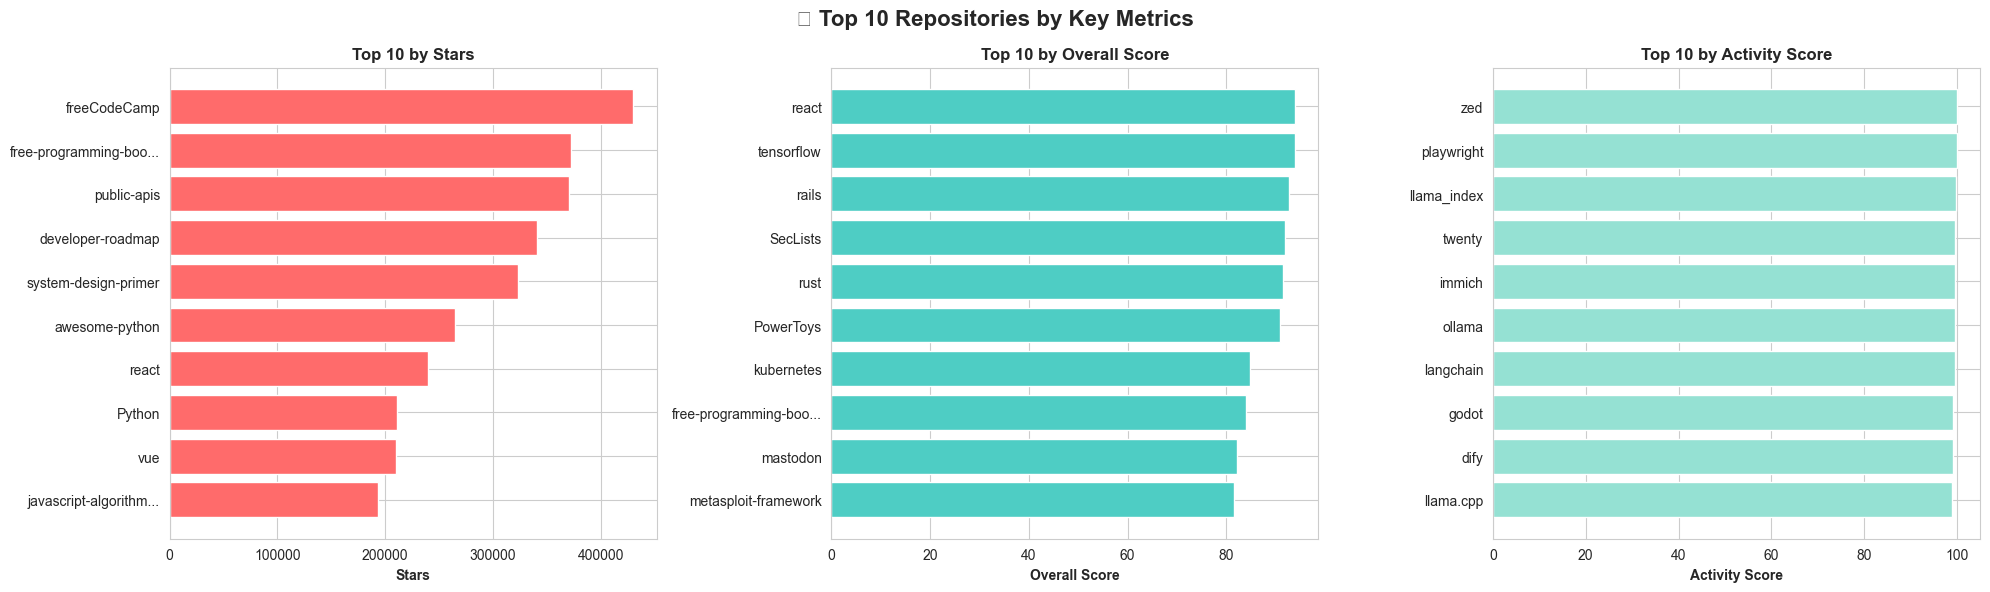


📊 Repository Characteristics Summary:
--------------------------------------------------------------------------------
   • Total repositories: 1,200
   • Average stars per repo: 36140.0
   • Average forks per repo: 5673.2
   • Average contributors: 203.2
   • Repositories with 1,000+ stars: 1,200
   • Repositories with 100+ contributors: 799

🏷️ Language Representation in Top 10:
--------------------------------------------------------------------------------


,Top by Stars,Top by Score,Top by Activity
language,,,
C#,0,1,0
C++,0,1,2
Go,0,1,1
JavaScript,2,1,0
PHP,0,1,0
Python,5,1,2
Ruby,0,3,0
Rust,0,1,1
TypeScript,3,0,4


In [7]:
# Top Repositories Analysis
print("🏆 TOP REPOSITORIES ANALYSIS")
print("=" * 80)

# Top repositories by different metrics
top_n = 10

print(f"\n⭐ Top {top_n} Repositories by Stars:")
print("-" * 80)
top_stars = df.nlargest(top_n, 'stars')[['name', 'language', 'stars', 'forks', 'overall_score']]
display(top_stars)

print(f"\n🏆 Top {top_n} Repositories by Overall Score:")
print("-" * 80)
top_score = df.nlargest(top_n, 'overall_score')[['name', 'language', 'overall_score', 'stars', 'forks']]
display(top_score)

print(f"\n⚡ Top {top_n} Repositories by Activity Score:")
print("-" * 80)
top_activity = df.nlargest(top_n, 'activity_score')[['name', 'language', 'activity_score', 'contributors_count', 'commits_365d']]
display(top_activity)

# Top repositories visualization
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('🏆 Top 10 Repositories by Key Metrics', fontsize=16, fontweight='bold')

# Top by stars
top_stars_plot = df.nlargest(10, 'stars')
bars1 = axes[0].barh(range(len(top_stars_plot)), top_stars_plot['stars'], color='#FF6B6B')
axes[0].set_yticks(range(len(top_stars_plot)))
axes[0].set_yticklabels([f"{name[:20]}..." if len(name) > 20 else name for name in top_stars_plot['name']])
axes[0].set_xlabel('Stars', fontweight='bold')
axes[0].set_title('Top 10 by Stars', fontweight='bold')
axes[0].invert_yaxis()

# Top by overall score
top_score_plot = df.nlargest(10, 'overall_score')
bars2 = axes[1].barh(range(len(top_score_plot)), top_score_plot['overall_score'], color='#4ECDC4')
axes[1].set_yticks(range(len(top_score_plot)))
axes[1].set_yticklabels([f"{name[:20]}..." if len(name) > 20 else name for name in top_score_plot['name']])
axes[1].set_xlabel('Overall Score', fontweight='bold')
axes[1].set_title('Top 10 by Overall Score', fontweight='bold')
axes[1].invert_yaxis()

# Top by activity score
top_activity_plot = df.nlargest(10, 'activity_score')
bars3 = axes[2].barh(range(len(top_activity_plot)), top_activity_plot['activity_score'], color='#95E1D3')
axes[2].set_yticks(range(len(top_activity_plot)))
axes[2].set_yticklabels([f"{name[:20]}..." if len(name) > 20 else name for name in top_activity_plot['name']])
axes[2].set_xlabel('Activity Score', fontweight='bold')
axes[2].set_title('Top 10 by Activity Score', fontweight='bold')
axes[2].invert_yaxis()

plt.tight_layout()
plt.show()

# Repository characteristics summary
print(f"\n📊 Repository Characteristics Summary:")
print("-" * 80)
print(f"   • Total repositories: {len(df):,}")
print(f"   • Average stars per repo: {df['stars'].mean():.1f}")
print(f"   • Average forks per repo: {df['forks'].mean():.1f}")
print(f"   • Average contributors: {df['contributors_count'].mean():.1f}")
print(f"   • Repositories with 1,000+ stars: {len(df[df['stars'] >= 1000]):,}")
print(f"   • Repositories with 100+ contributors: {len(df[df['contributors_count'] >= 100]):,}")

# Language representation in top repositories
print(f"\n🏷️ Language Representation in Top 10:")
print("-" * 80)
top_stars_langs = top_stars['language'].value_counts()
top_score_langs = top_score['language'].value_counts()
top_activity_langs = top_activity['language'].value_counts()

lang_comparison = pd.DataFrame({
    'Top by Stars': top_stars_langs,
    'Top by Score': top_score_langs,
    'Top by Activity': top_activity_langs
}).fillna(0).astype(int)

display(lang_comparison)

---

<a id="health"></a>
## 6️⃣ Health Indicators Analysis

Measure repository maturity through documentation and community standards.

🏥 HEALTH INDICATORS ANALYSIS

📊 Health Indicator Presence:
--------------------------------------------------------------------------------
   Readme              : 1192 repos ( 99.3%)
   License             : 1130 repos ( 94.2%)
   Contributing        :  664 repos ( 55.3%)
   Code Of Conduct     :  400 repos ( 33.3%)

📈 Health Score Distribution:
--------------------------------------------------------------------------------
   Health Score  20:   12 repos (  1.0%)
   Health Score  40:  228 repos ( 19.0%)
   Health Score  60:  432 repos ( 36.0%)
   Health Score  80:  389 repos ( 32.4%)
   Health Score 100:  139 repos ( 11.6%)

💡 Health Indicators Impact on Overall Score:
--------------------------------------------------------------------------------
   Readme              : + 6.99 points (42.57 vs 35.59)
   License             : +11.88 points (43.22 vs 31.34)
   Contributing        : +12.76 points (48.23 vs 35.47)
   Code Of Conduct     : +12.69 points (50.98 vs 38.30)


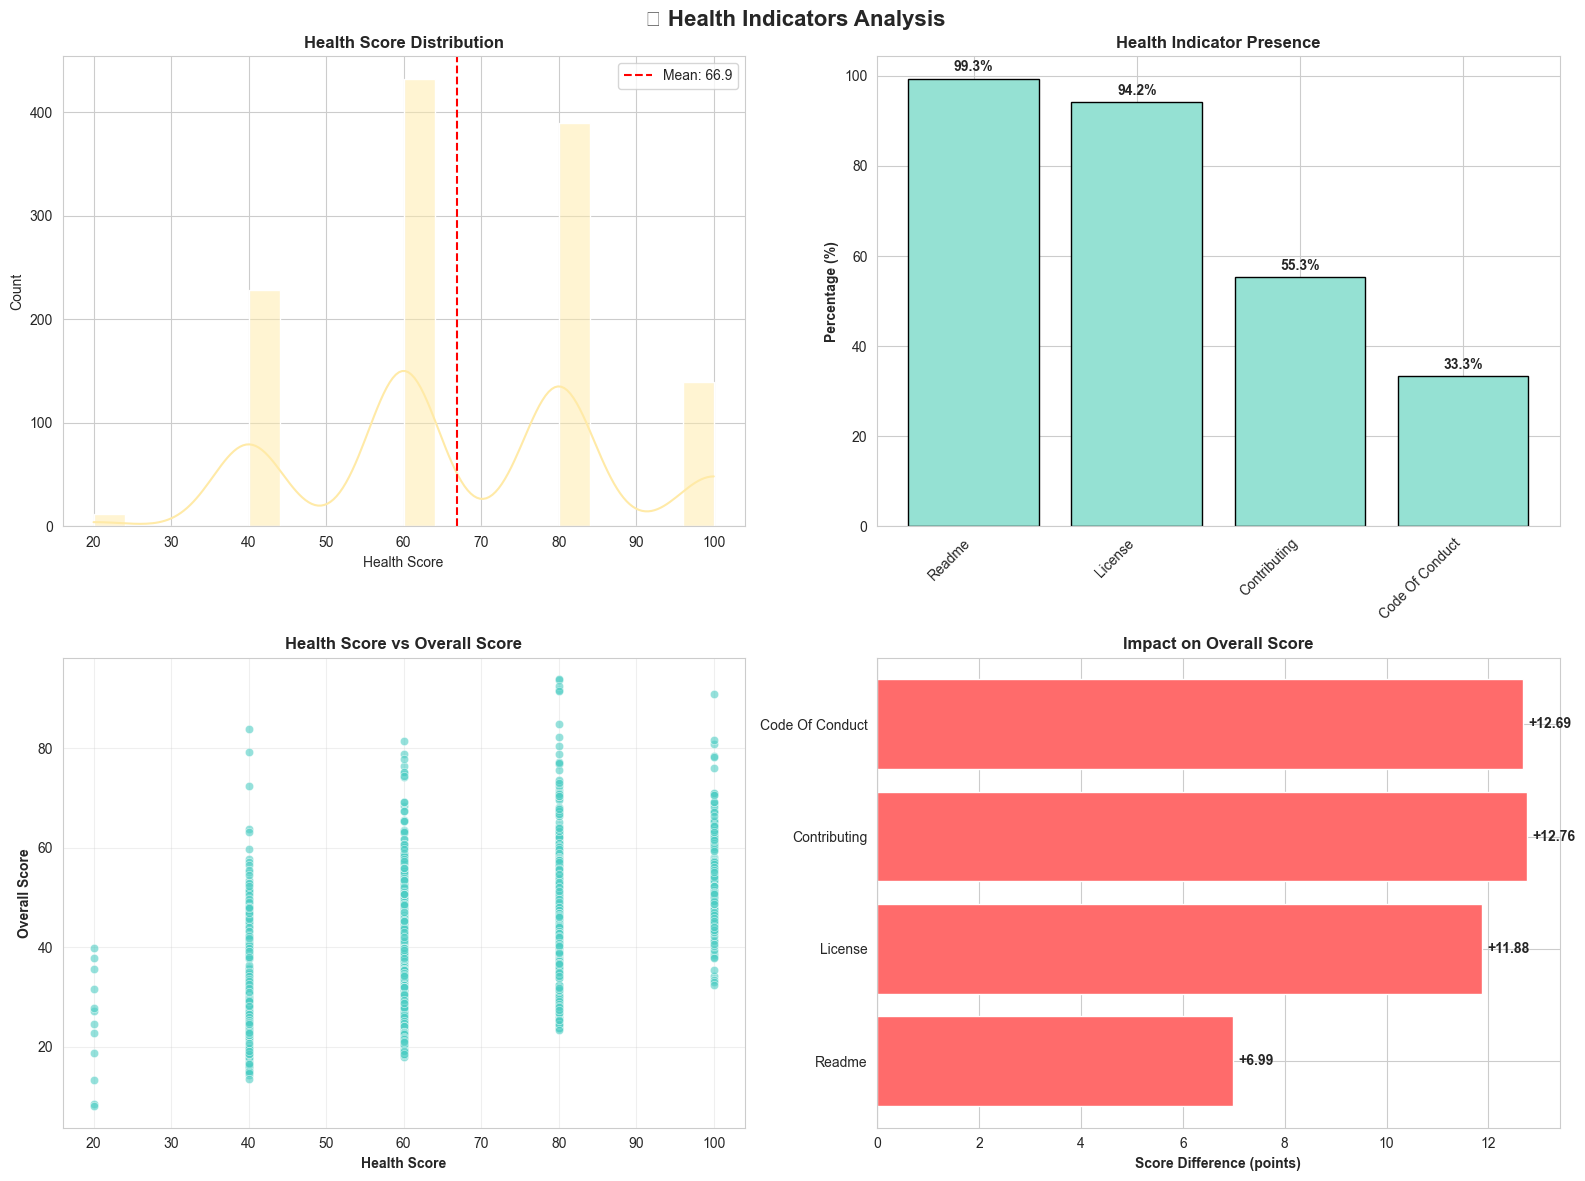


🎯 Key Health Insights:
--------------------------------------------------------------------------------
   • README files: 1192/1200 repos (99.3%)
   • Licenses: 1130/1200 repos (94.2%)
   • Contributing guidelines: 664/1200 repos (55.3%)
   • Code of conduct: 400/1200 repos (33.3%)
   • Strongest impact: Contributing (+12.76 points)
   • Health score range: 20.0 - 100.0 (out of 100)


In [8]:
# Health Indicators Analysis
print("🏥 HEALTH INDICATORS ANALYSIS")
print("=" * 80)

# Health indicator presence
health_indicators = ['has_readme', 'has_license', 'has_contributing', 'has_code_of_conduct']

print(f"\n📊 Health Indicator Presence:")
print("-" * 80)
for indicator in health_indicators:
    if indicator in df.columns:
        count = df[indicator].sum()
        percentage = (count / len(df)) * 100
        indicator_name = indicator.replace('has_', '').replace('_', ' ').title()
        print(f"   {indicator_name:<20}: {count:>4} repos ({percentage:>5.1f}%)")

# Health score distribution
print(f"\n📈 Health Score Distribution:")
print("-" * 80)
health_counts = df['health_score'].value_counts().sort_index()
for score, count in health_counts.items():
    percentage = (count / len(df)) * 100
    print(f"   Health Score {score:>3.0f}: {count:>4} repos ({percentage:>5.1f}%)")

# Health indicators impact on overall score
print(f"\n💡 Health Indicators Impact on Overall Score:")
print("-" * 80)

health_impact = {}
for indicator in health_indicators:
    if indicator in df.columns:
        with_indicator = df[df[indicator] == True]['overall_score'].mean()
        without_indicator = df[df[indicator] == False]['overall_score'].mean()
        difference = with_indicator - without_indicator
        indicator_name = indicator.replace('has_', '').replace('_', ' ').title()
        health_impact[indicator_name] = {
            'with': with_indicator,
            'without': without_indicator,
            'difference': difference
        }
        print(f"   {indicator_name:<20}: +{difference:>5.2f} points ({with_indicator:>5.2f} vs {without_indicator:>5.2f})")

# Health indicators visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('🏥 Health Indicators Analysis', fontsize=16, fontweight='bold')

# Health score distribution
sns.histplot(data=df, x='health_score', bins=20, kde=True, ax=axes[0,0], color='#FFEAA7')
axes[0,0].set_title('Health Score Distribution', fontweight='bold')
axes[0,0].set_xlabel('Health Score')
axes[0,0].axvline(df['health_score'].mean(), color='red', linestyle='--', label=f'Mean: {df["health_score"].mean():.1f}')
axes[0,0].legend()

# Health indicators presence
health_data = []
for indicator in health_indicators:
    if indicator in df.columns:
        indicator_name = indicator.replace('has_', '').replace('_', ' ').title()
        count = df[indicator].sum()
        percentage = (count / len(df)) * 100
        health_data.append({'Indicator': indicator_name, 'Count': count, 'Percentage': percentage})

health_df = pd.DataFrame(health_data)
bars = axes[0,1].bar(range(len(health_df)), health_df['Percentage'], color='#95E1D3', edgecolor='black')
axes[0,1].set_xticks(range(len(health_df)))
axes[0,1].set_xticklabels(health_df['Indicator'], rotation=45, ha='right')
axes[0,1].set_ylabel('Percentage (%)', fontweight='bold')
axes[0,1].set_title('Health Indicator Presence', fontweight='bold')

# Add percentage labels
for bar, perc in zip(bars, health_df['Percentage']):
    axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                  f'{perc:.1f}%', ha='center', va='bottom', fontweight='bold')

# Health score vs overall score
sns.scatterplot(data=df, x='health_score', y='overall_score', alpha=0.6, ax=axes[1,0], color='#4ECDC4')
axes[1,0].set_xlabel('Health Score', fontweight='bold')
axes[1,0].set_ylabel('Overall Score', fontweight='bold')
axes[1,0].set_title('Health Score vs Overall Score', fontweight='bold')
axes[1,0].grid(True, alpha=0.3)

# Health indicators impact
impact_data = []
for indicator, data in health_impact.items():
    impact_data.append({
        'Indicator': indicator,
        'Score Difference': data['difference']
    })

impact_df = pd.DataFrame(impact_data)
bars2 = axes[1,1].barh(range(len(impact_df)), impact_df['Score Difference'], color='#FF6B6B')
axes[1,1].set_yticks(range(len(impact_df)))
axes[1,1].set_yticklabels(impact_df['Indicator'])
axes[1,1].set_xlabel('Score Difference (points)', fontweight='bold')
axes[1,1].set_title('Impact on Overall Score', fontweight='bold')
axes[1,1].axvline(0, color='black', linestyle='-', alpha=0.3)

# Add difference labels
for bar, diff in zip(bars2, impact_df['Score Difference']):
    axes[1,1].text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
                  f'+{diff:.2f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n🎯 Key Health Insights:")
print("-" * 80)
print(f"   • README files: {df['has_readme'].sum()}/{len(df)} repos ({(df['has_readme'].sum()/len(df)*100):.1f}%)")
print(f"   • Licenses: {df['has_license'].sum()}/{len(df)} repos ({(df['has_license'].sum()/len(df)*100):.1f}%)")
print(f"   • Contributing guidelines: {df['has_contributing'].sum()}/{len(df)} repos ({(df['has_contributing'].sum()/len(df)*100):.1f}%)")
print(f"   • Code of conduct: {df['has_code_of_conduct'].sum()}/{len(df)} repos ({(df['has_code_of_conduct'].sum()/len(df)*100):.1f}%)")
print(f"   • Strongest impact: {max(health_impact, key=lambda x: health_impact[x]['difference'])} (+{max([v['difference'] for v in health_impact.values()]):.2f} points)")
print(f"   • Health score range: {df['health_score'].min()} - {df['health_score'].max()} (out of 100)")

---

<a id="insights"></a>
## 7️⃣ Key Insights & Summary

Comprehensive summary of all findings from this exploratory analysis.

In [9]:
# Key Insights Summary
print("🎯 KEY INSIGHTS FROM DATA EXPLORATION")
print("=" * 80)

print(f"\n📊 DATASET OVERVIEW:")
print("-" * 80)
print(f"   • Total repositories analyzed: {len(df):,}")
print(f"   • Programming languages covered: {df['language'].nunique()}")
print(f"   • Repositories per language: {len(df) // df['language'].nunique()}")
print(f"   • Total stars across all repos: {df['stars'].sum():,}")
print(f"   • Total forks across all repos: {df['forks'].sum():,}")

print(f"\n📈 SCORE DISTRIBUTIONS:")
print("-" * 80)
score_summary = df[['overall_score', 'popularity_score', 'activity_score', 'health_score']].describe()
for col in ['overall_score', 'popularity_score', 'activity_score', 'health_score']:
    mean_val = df[col].mean()
    std_val = df[col].std()
    min_val = df[col].min()
    max_val = df[col].max()
    col_name = col.replace('_score', '').title()
    print(f"   • {col_name:<12}: {mean_val:>5.2f} ± {std_val:>4.2f} (range: {min_val:>3.1f} - {max_val:>5.1f})")

print(f"\n🏆 TOP PERFORMERS:")
print("-" * 80)
top_lang = df.groupby('language')['overall_score'].mean().idxmax()
top_lang_score = df.groupby('language')['overall_score'].mean().max()
top_repo = df.loc[df['overall_score'].idxmax(), 'name']
top_repo_score = df['overall_score'].max()
print(f"   • Best language: {top_lang} ({top_lang_score:.2f} average score)")
print(f"   • Top repository: {top_repo} ({top_repo_score:.2f} overall score)")
print(f"   • Most starred repo: {df.loc[df['stars'].idxmax(), 'name']} ({df['stars'].max():,} stars)")

print(f"\n🏥 HEALTH INDICATORS:")
print("-" * 80)
readme_pct = (df['has_readme'].sum() / len(df)) * 100
license_pct = (df['has_license'].sum() / len(df)) * 100
contributing_pct = (df['has_contributing'].sum() / len(df)) * 100
coc_pct = (df['has_code_of_conduct'].sum() / len(df)) * 100
print(f"   • README presence: {readme_pct:.1f}% ({df['has_readme'].sum()}/{len(df)})")
print(f"   • License presence: {license_pct:.1f}% ({df['has_license'].sum()}/{len(df)})")
print(f"   • Contributing guidelines: {contributing_pct:.1f}% ({df['has_contributing'].sum()}/{len(df)})")
print(f"   • Code of conduct: {coc_pct:.1f}% ({df['has_code_of_conduct'].sum()}/{len(df)})")

print(f"\n💡 CRITICAL FINDINGS:")
print("-" * 80)
print(f"   • Activity score varies most between languages (range: {df['activity_score'].min():.1f} - {df['activity_score'].max():.1f})")
print(f"   • Health scores are consistently high (mean: {df['health_score'].mean():.1f}, std: {df['health_score'].std():.2f})")
print(f"   • {len(df[df['stars'] >= 1000]):,} repositories have 1,000+ stars")
print(f"   • {len(df[df['contributors_count'] >= 100]):,} repositories have 100+ contributors")
print(f"   • Strongest health impact: {max(health_impact, key=lambda x: health_impact[x]['difference'])} (+{max([v['difference'] for v in health_impact.values()]):.2f} points)")

print(f"\n🎯 NEXT STEPS:")
print("-" * 80)
print(f"   • Proceed to 02_language_comparison.ipynb for detailed rankings")
print(f"   • Explore 03_correlation_analysis.ipynb for relationship patterns")
print(f"   • Create visualizations in 04_advanced_visualizations.ipynb")

print(f"\n" + "=" * 80)
print(f"✅ DATA EXPLORATION COMPLETE!")
print(f"📊 Dataset: Clean, comprehensive, and ready for analysis")
print(f"🔍 Key takeaway: {top_lang} leads with strong activity and health indicators")
print(f"🚀 Ready for deeper analysis in subsequent notebooks!")
print("=" * 80)

🎯 KEY INSIGHTS FROM DATA EXPLORATION

📊 DATASET OVERVIEW:
--------------------------------------------------------------------------------
   • Total repositories analyzed: 1,200
   • Programming languages covered: 12
   • Repositories per language: 100
   • Total stars across all repos: 43,367,999
   • Total forks across all repos: 6,807,863

📈 SCORE DISTRIBUTIONS:
--------------------------------------------------------------------------------
   • Overall     : 42.53 ± 14.37 (range: 8.0 -  93.9)
   • Popularity  : 21.15 ± 15.63 (range: 6.0 - 100.0)
   • Activity    : 49.54 ± 28.27 (range: 0.1 - 100.0)
   • Health      : 66.92 ± 18.96 (range: 20.0 - 100.0)

🏆 TOP PERFORMERS:
--------------------------------------------------------------------------------
   • Best language: Rust (49.40 average score)
   • Top repository: react (93.95 overall score)
   • Most starred repo: freeCodeCamp (430,370 stars)

🏥 HEALTH INDICATORS:
--------------------------------------------------------------